In [1]:
import pandas as pd
import os
import numpy as np
from unidecode import unidecode
import nltk
import hazm
import string
import re

In [2]:
df=pd.read_csv('all_data_c.csv')
df1=pd.read_csv('stores_c.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12775 entries, 0 to 12774
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Index       12775 non-null  int64 
 1   Product ID  12775 non-null  object
 2   Site        12775 non-null  object
 3   Type        12775 non-null  object
 4   Shop_Nmae   12775 non-null  object
 5   Shop_LOC    12775 non-null  object
 6   Date        12775 non-null  object
 7   Time        12775 non-null  object
 8   Price       12775 non-null  object
 9   Shop_City   12775 non-null  object
dtypes: int64(1), object(9)
memory usage: 998.2+ KB


In [4]:
df.rename({'Id':'Product ID'},axis=1,inplace=True)

In [5]:
df2=pd.merge(df,df1,on='Product ID')

In [6]:
df2=df2[['Manufacturer','Attributes','Price','StockStatus']].copy()

In [7]:
df2.drop(df2.loc[df2.Attributes.isna()].index,inplace=True)

In [8]:
df2['text']=df2['Manufacturer']+' '+df2['Attributes']+' '+df2['StockStatus']

In [9]:
df=df2
df

,Manufacturer,Attributes,Price,StockStatus,text
1,lenovo,{'سازنده پردازنده': 'Intel® Core™ i7-4600U Pro...,28928000,new,lenovo {'سازنده پردازنده': 'Intel® Core™ i7-46...
2,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",16700000,new,"lenovo {'برند': 'LENOVO', 'ابعاد': '362.2×253...."
3,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",19700000,new,"lenovo {'برند': 'LENOVO', 'ابعاد': '362.2×253...."
4,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",17079000,new,"lenovo {'برند': 'LENOVO', 'ابعاد': '362.2×253...."
5,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",18879000,new,"lenovo {'برند': 'LENOVO', 'ابعاد': '362.2×253...."
...,...,...,...,...,...
12783,lenovo,"[{'title': 'وزن', 'values': ['2.4 کیلوگرم']}, ...",591500000,new,"lenovo [{'title': 'وزن', 'values': ['2.4 کیلوگ..."
12784,lenovo,"[{'title': 'وزن', 'values': ['2.4 کیلوگرم']}, ...",590000000,new,"lenovo [{'title': 'وزن', 'values': ['2.4 کیلوگ..."
12785,lenovo,"[{'title': 'وزن', 'values': ['2.4 کیلوگرم']}, ...",642500000,new,"lenovo [{'title': 'وزن', 'values': ['2.4 کیلوگ..."
12786,lenovo,"[{'title': 'وزن', 'values': ['2.25 کیلوگرم']},...",463000000,new,"lenovo [{'title': 'وزن', 'values': ['2.25 کیلو..."


In [10]:
def normalizeing(text):
    normalizer = hazm.Normalizer()
    return normalizer.normalize(text)
df['text'] = df['text'].apply(lambda x: normalizeing(x))

In [11]:
def convert_to_lower(text):
    return text.lower()
df['text'] = df['text'].apply(lambda x: convert_to_lower(x))

In [12]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

In [13]:
with open('stopwords.txt',encoding='utf-8') as stopwords_file:
    stopwords=stopwords_file.readlines()
stopwords=[line.replace('\n','') for line in stopwords]
nltk.download('stopwords')
nltk_stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(nltk_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aghil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def remove_stopwords(text):
    removed = []
    stop_words = stopwords
    tokens = nltk.word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [15]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z0-9آ-ی۰-۹]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc
df['text'] = df['text'].apply(lambda x: remove_extra_white_spaces(x))

In [16]:
def stemmering_f(text):
    stemmer = hazm.Stemmer()
    tokens = hazm.word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = stemmer.stem(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: stemmering_f(x))

In [17]:
def stemmering_e(text):
    stemmer = nltk.SnowballStemmer('english')
    tokens = nltk.word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = stemmer.stem(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: stemmering_e(x))

In [18]:
def unicode(text):
    return unidecode(text)
df['text'] = df['text'].apply(lambda x: unicode(x))

In [19]:
def to_float(text):
    try:
        return float(text)
    except: return 0
df['Price'] = df['Price'].apply(lambda x: to_float(x))

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.drop(df.loc[df.Price==0].index,inplace=True)

In [22]:
df

,Manufacturer,Attributes,Price,StockStatus,text
0,lenovo,{'سازنده پردازنده': 'Intel® Core™ i7-4600U Pro...,28928000.0,new,lenovo szndh prdzndh intel(r) core(tm) i 74600...
1,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",16700000.0,new,lenovo brnd lenovo b`d 362 .2x 253 .4x 19 .9 m...
2,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",19700000.0,new,lenovo brnd lenovo b`d 362 .2x 253 .4x 19 .9 m...
3,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",17079000.0,new,lenovo brnd lenovo b`d 362 .2x 253 .4x 19 .9 m...
4,lenovo,"{'برند': 'LENOVO', 'ابعاد': '362.2×253.4×19.9 ...",18879000.0,new,lenovo brnd lenovo b`d 362 .2x 253 .4x 19 .9 m...
...,...,...,...,...,...
12739,lenovo,"[{'title': 'وزن', 'values': ['2.4 کیلوگرم']}, ...",591500000.0,new,lenovo titl wzn valu 2.4 khylwgr titl b`d valu...
12740,lenovo,"[{'title': 'وزن', 'values': ['2.4 کیلوگرم']}, ...",590000000.0,new,lenovo titl wzn valu 2.4 khylwgr titl b`d valu...
12741,lenovo,"[{'title': 'وزن', 'values': ['2.4 کیلوگرم']}, ...",642500000.0,new,lenovo titl wzn valu 2.4 khylwgr titl b`d valu...
12742,lenovo,"[{'title': 'وزن', 'values': ['2.25 کیلوگرم']},...",463000000.0,new,lenovo titl wzn valu 2. 25 khylwgr titl b`d va...


In [23]:
# Define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 300 #can plot a graph for length
MAX_NB_WORDS = 4000
EMBEDDING_DIM = 400


In [24]:
import tensorflow as tf
from collections import Counter
import pickle
from tensorflow.keras.layers import Embedding,LSTM,Dropout,BatchNormalization,GlobalMaxPooling1D,Dense,Input,Flatten,TimeDistributed
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import GRU

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [26]:
x=df.text
y=np.log2(df.Price)

<AxesSubplot:>

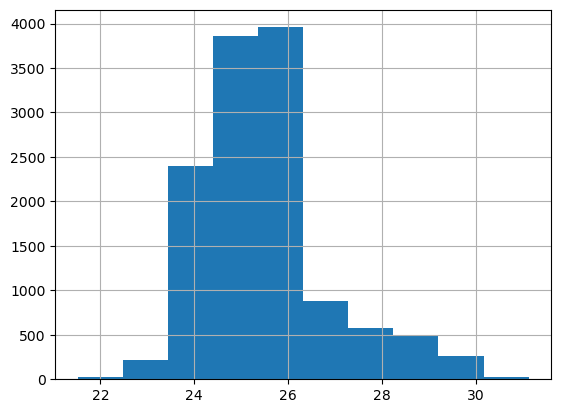

In [27]:
y.hist()

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=44)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import smogn

In [30]:
tfidf=TfidfVectorizer()

In [31]:
tfidf.fit(xtrain)

TfidfVectorizer()

In [36]:
import pickle
f=open('la_v.quera','ab')
pickle.dump(tfidf,f)
f.close()

In [32]:
x0=tfidf.transform(x)
xtest0=tfidf.transform(xtest)
xtrain0=tfidf.transform(xtrain)

In [34]:
model_r=XGBRegressor()

In [45]:
model_r.fit(x0,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
model_r.score(xtrain0,ytrain)

0.9860286607454324

In [47]:
model_r.score(xtest0,ytest)

0.9891351019920784

In [48]:
y_predict=model_r.predict(xtest0)

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
mean_absolute_error(y_pred=y_predict,y_true=ytest)

0.07967753143516865

In [54]:
text='''نگ
سرمه ای تیره
ابعاد
304.1 × 215 × 11.3 میلی‌متر
وزن
1.24 Kg
جنس بدنه
تمام آلومنیوم
سازنده پردازنده
Apple
سری پردازنده
Apple M2
مدل پردازنده
M2
هسته اصلی
8 هسته
هسته Performance (عملکرد بالا)
4 هسته
هسته Efficient (کم مصرف)
4 هسته
هسته مجازی(تِرِد)
8 هسته
فرکانس پایه
3.5 گیگاهرتز
مجموع حافظه Cache
20 مگابایت
ظرفیت حافظه RAM
8GB
نوع حافظه RAM
LPDDR5
پهنای باند BUS
5200 MHz
قابلیت ارتقا RAM
ندارد
حافظه مکانیکی
ندارد
ظرفیت حافظه SSD
256GB
نوع حافظه SSD
M.2 NVMe
برند تراشه گرافیکی
Apple
مدل گرافیک یکپارچه
M2 GPU (10 core)
اندازه صفحه نمایش
13.6 inch
نوع پنل صفحه نمایش
Liquid Retina
دقت صفحه نمایش
2.5K (2560 × 1664)
نرخ نوسازی تصویر
120 هرتز
سطح صفحه نمایش
براق
صفحه نمایش لمسی
ندارد
توضیحات تکمیلی
روشنایی 500 Nits, زاویه دید 178 درجه
تعداد پورت USB 2.0
ندارد
تعداد پورت USB 3.0
ندارد
پورت USB Type-C
دارد
پورت ThunderBolt
2 پورت
پورت HDMI
ندارد
پورت شبکه
ندارد
پورت هدفن
دارد
کارت خوان
ندارد
شبکه بیسیم WiFi
Wi-Fi 6 (802.11ax) (Dual band) 2 × 2
بلوتوث
Bluetooth 5.0
نور پس زمینه کیبورد
دارد
حسگر اثر انگشت
دارد
تاچ پد
چند لمسی, قابلیت سنجش فشار
وبکم
دارد
توضیحات وبکم
FHD(1080p)
اسپیکر
دارد
مشخصات اسپیکر
Dolby Atmos, Wide stereo sound
درایو نوری
ندارد
نوع باتری
لیتیوم پلیمری
ظرفیت باتری
با ظرفیت 52.6 وات ساعت
شارژدهی باتری
تا 11 ساعت
اقلام همراه
شارژر
سیستم عامل
MacOS
رده کاربری
مدیریتی - مهندسی - اداری'''
text=normalizeing(text)
text=convert_to_lower(text)
text=remove_punctuation(text)
text=remove_stopwords(text)
text=remove_extra_white_spaces(text)
text=stemmering_f(text)
text=stemmering_e(text)
text=unicode(text)
text=[text]
text=tfidf.transform((text))

In [55]:
model_r.predict(text)

array([25.790287], dtype=float32)

In [56]:
round(pow(2,model_r.predict(text)[0]))

58029655

In [57]:
f=open('la_xb.quera','ab')
pickle.dump(model_r,f)
f.close()

In [99]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(xtrain.astype(str))
train_sequences = tokenizer.texts_to_sequences(xtrain.astype(str))
test_sequences = tokenizer.texts_to_sequences(xtest.astype(str))
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 4039 unique tokens.


In [100]:
#some padding shit
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post',
    truncating='post')
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post',
    truncating='post')

In [101]:
train_data

array([[ 108,  127,  372, ...,    0,    0,    0],
       [1213,   23,    1, ...,    0,    0,    0],
       [ 250,  127,  356, ...,    0,    0,    0],
       ...,
       [ 551,   23,    1, ...,    0,    0,    0],
       [ 250,    1,   35, ...,    0,    0,    0],
       [ 147,   53,   55, ...,    0,    0,    0]])

In [102]:
ytrain.shape

(10156,)

In [103]:
model_r.fit(train_data,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [104]:
model_r.score(train_data,ytrain)

0.9869579805950695

In [105]:
model_r.score(test_data,ytest)

0.9562588521786918

In [106]:
in1=Input(shape=(MAX_SEQUENCE_LENGTH))
x=Embedding(MAX_NB_WORDS,100)(in1)
x=LSTM(64,return_sequences=True)(x)
x=LSTM(32,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
#x=Dense(50,activation='relu')(x)
#x=Dense(20,activation='relu')(x)
x=Dense(500,activation='relu')(x)
x=Dense(200,activation='relu')(x)
x=Dense(100,activation='relu')(x)
out=Dense(1,)(x)

In [107]:
model = Model(inputs=in1, outputs=out)

In [108]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 100)          400000    
                                                                 
 lstm (LSTM)                 (None, 300, 64)           42240     
                                                                 
 lstm_1 (LSTM)               (None, 300, 32)           12416     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 500)               16500     
                                                             

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

pat=EarlyStopping(patience=5)

In [110]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), loss=tf.keras.losses.mae, metrics=tf.keras.metrics.mean_absolute_error)

In [ ]:

history = model.fit(
    train_data, np.array(ytrain), batch_size=10, epochs=50, validation_split=0.2,callbacks=[])

Epoch 1/50


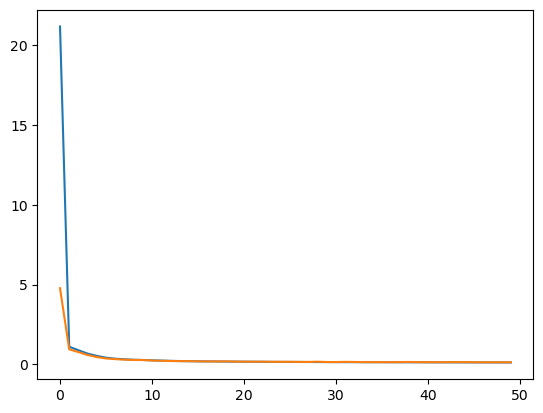

In [469]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [486]:
text='''برند
HUAWEI
مدل
MATEBOOK B3 520
رم
8GB
هارد
512GB SSD
گرافیک
iris xe
صفحه نمایش
15.6 FHD
رنگ
مشکی'''
text=normalizeing(text)
text=convert_to_lower(text)
text=remove_punctuation(text)
text=remove_stopwords(text)
text=remove_extra_white_spaces(text)
text=stemmering_f(text)
text=stemmering_e(text)
text=unicode(text)

In [487]:
text=tokenizer.texts_to_sequences(text)
text = pad_sequences(text, maxlen=MAX_SEQUENCE_LENGTH,padding='post',
    truncating='post')

In [488]:
text

array([[  53,    0,    0, ...,    0,    0,    0],
       [   8,    0,    0, ...,    0,    0,    0],
       [ 295,    0,    0, ...,    0,    0,    0],
       ...,
       [ 142,    0,    0, ...,    0,    0,    0],
       [1993,    0,    0, ...,    0,    0,    0],
       [ 142,    0,    0, ...,    0,    0,    0]])

In [489]:
pow(2,model.predict(text)[0][0])

3/3 [==============================] - 0s 15ms/step


32216396.757774144